In [16]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Chargement du jeu de données de séries temporelles : je choisi trian.csv

data = pd.read_csv("data/train.csv")


In [18]:
# Conversion de la colonne 'Date' en format datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [19]:
# Analyse exploratoire des données temporelles
# Affichage des premières lignes du jeu de données

print(data.head())

            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False


In [20]:
# Infos sur le jeu de données (types, valeurs manquantes, etc.)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB
None


In [21]:
# Statistiques descriptives

#choix des caracteristiques importantes pour continuer a travailler avec

print(data.describe())


               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


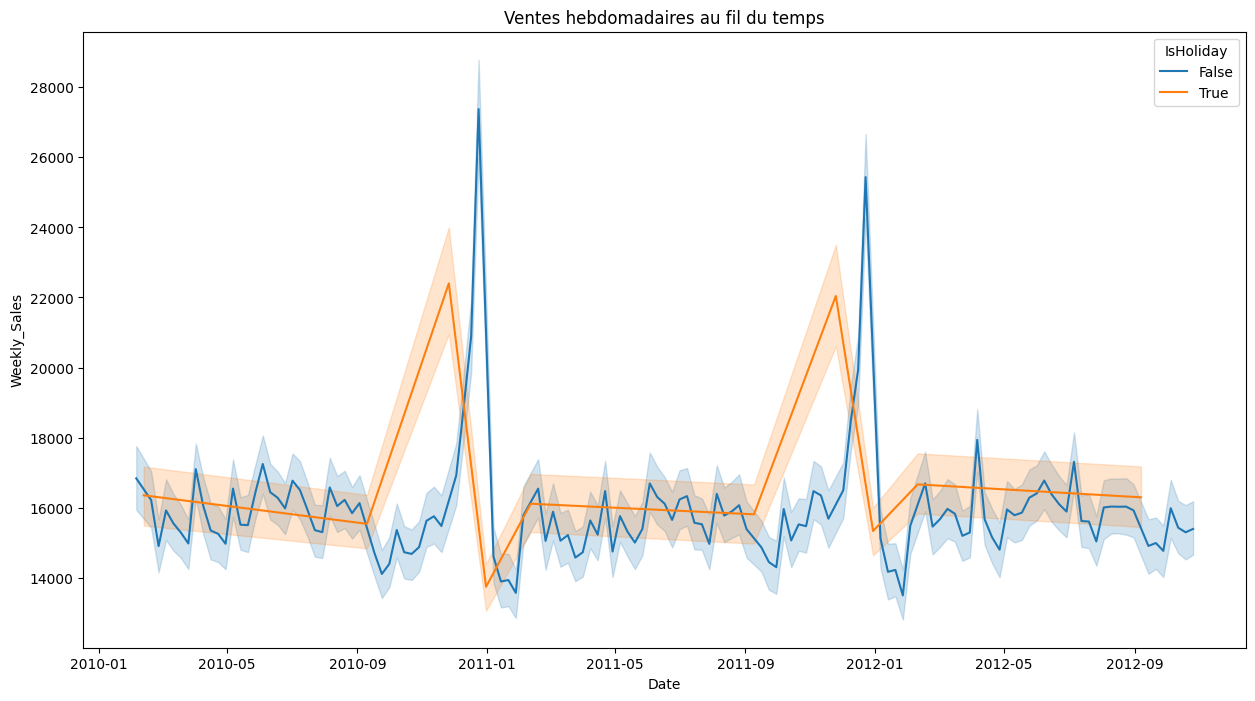

In [22]:
# Visualisation des tendances, saisons et événements significatifs
# Exemple : Visualisation de la série temporelle

# Exploration des données
plt.figure(figsize=(15, 8))
sns.lineplot(x=data.index, y='Weekly_Sales', data=data, hue='IsHoliday')
plt.title('Ventes hebdomadaires au fil du temps')
plt.show()

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score




In [24]:
# Choix des caractéristiques pertinentes
features = ['Weekly_Sales', 'IsHoliday']

In [25]:
# Division des données en ensembles d'entraînement et de test
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]


In [26]:
# Entraînement du modèle de séries temporelles (Holt-Winters)
model = ExponentialSmoothing(train_data['Weekly_Sales'], seasonal='add', seasonal_periods=12)
result = model.fit()


c:\python install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python install\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
#voir les entrée d'entrainement
print(train_data['Weekly_Sales'])

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
                ...   
2010-10-22     3600.00
2010-10-29     1095.00
2010-11-05     2930.00
2010-11-12     3215.00
2010-11-19     3448.00
Name: Weekly_Sales, Length: 337256, dtype: float64


In [28]:
# Prédictions sur l'ensemble de test
predictions = result.forecast(len(test_data))

c:\python install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\python install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


print(test_data.index)
print(predictions.index)


In [30]:
# Évaluation des performances du modèle
mae = mean_absolute_error(test_data['Weekly_Sales'], predictions)
print(f'Mean Absolute Error (MAE): {mae}')

print('R-squared:', r2_score(test_data, train_data))


Mean Absolute Error (MAE): 11679.773755516462


ValueError: y_true and y_pred have different number of output (4!=1)

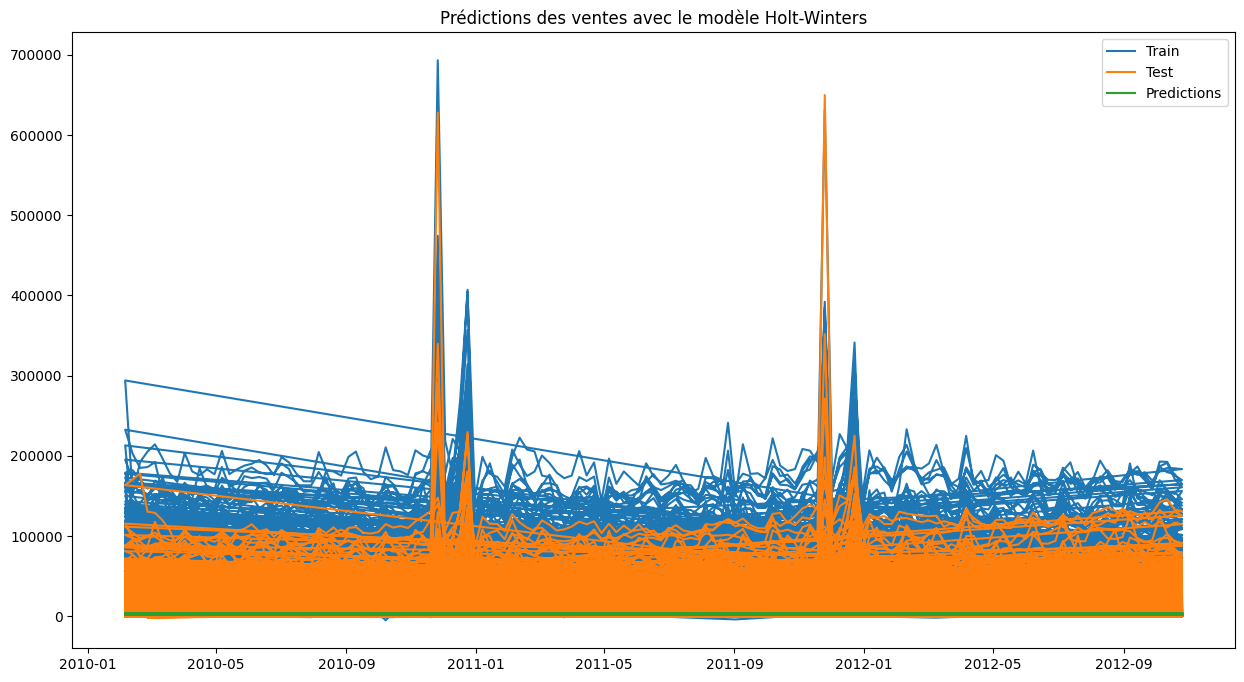

In [ ]:
# Visualisation des prédictions
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data['Weekly_Sales'], label='Train')
plt.plot(test_data.index, test_data['Weekly_Sales'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('Prédictions des ventes avec le modèle Holt-Winters')
plt.legend()
plt.show()

In [ ]:
# Enregistrez le modèle avec pickle
import pickle

with open('modele_holt_winters.pkl', 'wb') as model_file:
    #pickle.dump(model, model_file)
    pickle.dump(result, model_file)
